In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img):
    plt.figure(figsize=(12,10))
    plt.imshow(img,cmap='gray')

In [4]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)     

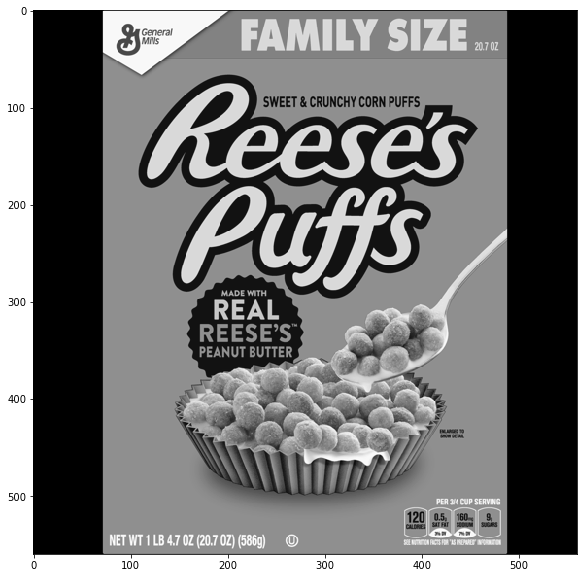

In [5]:
display(reeses)

In [6]:
cereal = cv2.imread('../DATA/many_cereals.jpg',0)     

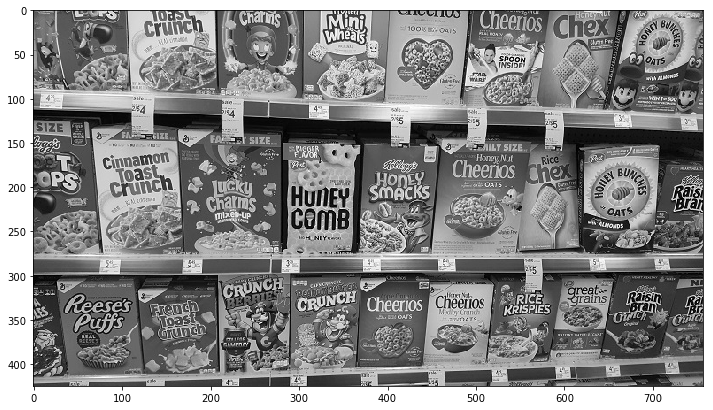

In [7]:
display(cereal)

In [8]:
orb = cv2.ORB_create()

In [66]:
kp1 , des1 = orb.detectAndCompute(reeses,None)
kp2 , des2 = orb.detectAndCompute(cereal,None)

In [67]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [68]:
matches =bf.match(des1,des2)

In [69]:
matches[7].distance

64.0

In [70]:
reese_matches = cv2.drawMatches(reeses,kp1,cereal,kp2,matches[:10],None)

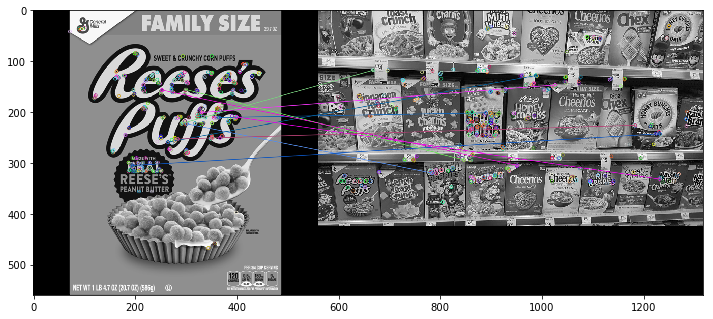

In [71]:
display(reese_matches)

In [72]:
sift= cv2.xfeatures2d.SIFT_create()

In [73]:
kp1,des1 = sift.detectAndCompute(reeses,None)

In [74]:
kp2,des2 = sift.detectAndCompute(cereal,None)

In [75]:
bf = cv2.BFMatcher()

In [76]:
matches = bf.knnMatch(des1,des2,k=2)

In [77]:
matches[22][0].distance

285.81463623046875

In [107]:
goodmatch = []

for i , j in matches:
    if i.distance < 0.5*j.distance:
        goodmatch.append([i])

In [108]:
len(goodmatch)

44

In [109]:
len(matches)

1500

In [110]:
sift_matches= cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,goodmatch,None,flags=2)

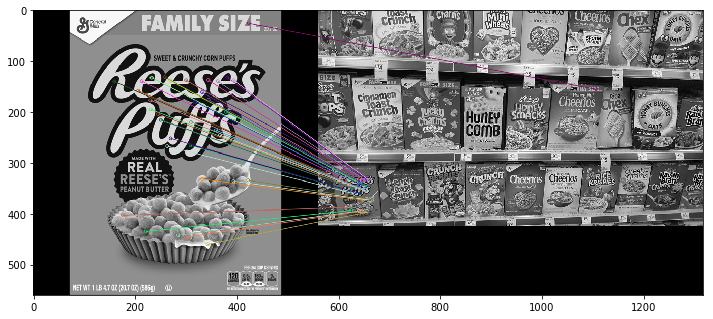

In [111]:
display(sift_matches)